In [152]:
#utils for algorithms

import numpy as np

def distances(point, points):
    return [(candidate[0] - point[0]) ** 2 + (candidate[1] - point[1]) ** 2 for candidate in points]

def closestCentroidLabel(point, centroids):
    distancesList = distances(point, centroids)
    return distancesList.index(min(distancesList))


In [ ]:
def kMeans(dataset, metric, cluster_count):
    def iteration(centroids):
        labels = []
        for point in dataset:
            labels.append(closestCentroidLabel(point, centroids))
        indecies = [[i for i,x in enumerate(labels) if x == j ] for j in range(cluster_count)]
        clusters = [[p for p in dataset[indecies[i]] ] for i in range(cluster_count)] 
        new_centroids = [np.mean(cluster, axis=0) for cluster in clusters]
        change = np.sum([min(distances(p, centroids)) for p in new_centroids])

        return new_centroids, labels, clusters, change

    best_thus_far = np.inf
    for i in range(20):
        current_centroids = dataset[np.random.permutation(len(dataset))[:cluster_count]]
        change = 1
        while change != 0:
            current_centroids, labels, clusters, change = iteration(current_centroids)
        
        new_metric_result = metric(clusters, current_centroids)
        best_thus_far = min(best_thus_far, new_metric_result)
        if best_thus_far == new_metric_result:
            result_centroids = current_centroids
            result_labels = labels

    np.savetxt('centroids.txt', np.array(result_centroids))
    np.savetxt('cluster_labels.txt', np.array(result_labels), fmt="%d")


In [154]:
def kMeansplusplus(dataset, metric, cluster_count):
    return "hello"


In [155]:
def wcss(clusters, centroids):
    return np.sum([np.sum(distances(centroids[i], clusters[i])) for i, _ in enumerate(centroids)])


In [ ]:
# utils for main

def chooseAlgorithm(name):
    pairs = {
        "kMeans" : kMeans,
        "kMeans++" : kMeansplusplus,
    }

    return pairs[name]

def chooseMetric(number):
    pairs = {
        "1" : wcss,
        "2" : dunnIndex,
    }

    return pairs[number]


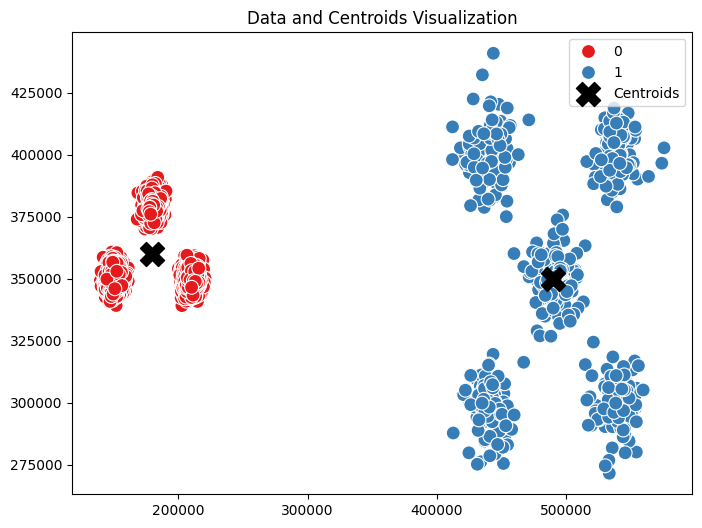

In [160]:
import sys
#inp = input("<data_file> <algorithm_name> <metric> <cluster_count>")
inp = "unbalance.txt kMeans 1 2"
labels = inp.split(" ")
if len(labels) != 4:
    sys.exit("Not a valid input")

algorithm = chooseAlgorithm(labels[1])
metric = chooseMetric(labels[2])

labels[0] = "Datasets\\" + labels[0][:-4] + "\\" + labels[0]

algorithm(np.loadtxt(labels[0]) ,metric, int(labels[3]))

%run plot_clusters.py {labels[0]} centroids.txt cluster_labels.txt
